In [8]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import synapseclient

We have two versions of this data: v2 that has raw counts, but no metadata; and v3 that has the metadata but the counts converted to z-scores. The goal of this notebook is to use v2 to perform the same qc steps as with MSK and prepare a file to be used to compute pseudobulk, using the metadata from v3.

# Loading data

In [9]:
syn = synapseclient.Synapse()
syn.login()

Welcome, heimann!



## Vanderbilt v2

In [2]:
#Load data
#Version 2 of file - with raw counts, link from HTAN: syn27056098
entity = syn.get('syn27056098')
adata = sc.read_h5ad(entity.path)
adata

AnnData object with n_obs × n_vars = 10700 × 30234
    obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Tumor_Type', 'Sample_Classification'
    obsm: 'X_pca', 'X_umap'

In [19]:
#let's take a look at the raw counts
adata.layers['counts'] = adata.X
adata.to_df(layer = "counts")

,5S_rRNA,5_8S_rRNA,7SK,A1BG,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,...,ZZEF1,ZZZ3,bP-21201H5.2,bP-21264C1.2,bP-2171C21.3,bP-2189O9.3,pRNA,snoU109,snoU13,uc_338
ACGGAATTTGCTCTAGT-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GAATGGGCACGTACCTTG-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGACGTATCGGTGACGGAC-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATCTAGCAGCGTGGATA-0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GACGTCAGCAACGGTAGC-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCTTTGTACTGAGTT-19-5898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATCCGCTAAAGCTTCT-19-5898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGATCCCTGATCGGGTAGT-20-5898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGAATGACTTTGGGAAGGT-22-5898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#takinng a look at the cell types
adata.obs["Cell_Type"].value_counts()

Cell_Type
T      4410
PLA    2236
B      1228
MYE    1209
FIB     713
MAS     506
END     394
Name: count, dtype: int64

## Vanderbilt v3

In [15]:
#Load data
#Version 3 of file - with metadata, counts in z-score from cellxgene (downloaded and saved in iAtlas Synapse folder)
entity = syn.get('syn61517178')
adata3 = sc.read_h5ad(entity.path)
adata3

AnnData object with n_obs × n_vars = 10696 × 29577
    obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Tumor_Type', 'Sample_Classification', 'development_stage_ontology_term_id', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [5]:
#let's take a look at the raw counts
adata3.layers['counts'] = adata3.X
adata3.to_df(layer = "counts")

gene_id,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256661,ENSG00000256904,ENSG00000128274,ENSG00000118017,ENSG00000094914,...,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755,ENSG00000036549,ENSG00000280372,ENSG00000278932,ENSG00000279501,ENSG00000279579
ACGGAATTTGCTCTAGT-0,-0.028682,-0.091783,-0.282198,-0.023624,-0.042998,-0.051998,0.0,-0.109127,-0.029677,-0.198348,...,-0.313129,-0.08053,-0.423156,3.824342,-0.364596,-0.330099,-0.013108,-0.064211,-0.016749,0.0
GAATGGGCACGTACCTTG-0,-0.028682,-0.091783,-0.282198,-0.023624,-0.042998,-0.051998,0.0,-0.109127,-0.029677,-0.198348,...,-0.313129,-0.08053,-0.423156,-0.320613,2.341169,-0.330099,-0.013108,-0.064211,-0.016749,0.0
TGACGTATCGGTGACGGAC-0,-0.028682,-0.091783,-0.282198,-0.023624,-0.042998,-0.051998,0.0,-0.109127,-0.029677,-0.198348,...,-0.313129,-0.08053,-0.423156,-0.320613,-0.364596,-0.330099,-0.013108,-0.064211,-0.016749,0.0
ATCTAGCAGCGTGGATA-0,-0.028682,-0.091783,1.517989,-0.023624,-0.042998,-0.051998,0.0,-0.109127,-0.029677,-0.198348,...,-0.313129,-0.08053,1.219473,2.924861,-0.364596,-0.330099,-0.013108,-0.064211,-0.016749,0.0
GACGTCAGCAACGGTAGC-0,-0.028682,-0.091783,-0.282198,-0.023624,-0.042998,-0.051998,0.0,-0.109127,-0.029677,-0.198348,...,-0.313129,-0.08053,1.925677,-0.320613,-0.364596,-0.330099,-0.013108,-0.064211,-0.016749,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCTTTGTACTGAGTT-19-5898,-0.028682,-0.091783,-0.282198,-0.023624,-0.042998,-0.051998,0.0,-0.109127,-0.029677,-0.198348,...,-0.313129,-0.08053,-0.423156,-0.320613,-0.364596,-0.330099,-0.013108,-0.064211,-0.016749,0.0
ATCCGCTAAAGCTTCT-19-5898,-0.028682,-0.091783,-0.282198,-0.023624,-0.042998,-0.051998,0.0,-0.109127,-0.029677,-0.198348,...,-0.313129,-0.08053,-0.423156,-0.320613,-0.364596,-0.330099,-0.013108,-0.064211,-0.016749,0.0
TGATCCCTGATCGGGTAGT-20-5898,-0.028682,-0.091783,-0.282198,-0.023624,-0.042998,-0.051998,0.0,-0.109127,-0.029677,-0.198348,...,-0.313129,-0.08053,-0.423156,-0.320613,1.665290,-0.330099,-0.013108,-0.064211,-0.016749,0.0
TGAATGACTTTGGGAAGGT-22-5898,-0.028682,-0.091783,-0.282198,-0.023624,-0.042998,-0.051998,0.0,-0.109127,-0.029677,8.519033,...,-0.313129,-0.08053,-0.423156,-0.320613,-0.364596,-0.330099,-0.013108,-0.064211,-0.016749,0.0


In [6]:
# just to highlight that adata3 has z-scores, compute the summary stats
pd.DataFrame.describe(adata3.to_df(layer = "counts"))

gene_id,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256661,ENSG00000256904,ENSG00000128274,ENSG00000118017,ENSG00000094914,...,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755,ENSG00000036549,ENSG00000280372,ENSG00000278932,ENSG00000279501,ENSG00000279579
count,1.070000e+04,10700.000000,10700.000000,1.070000e+04,1.070000e+04,1.070000e+04,10700.0,1.070000e+04,10700.000000,1.070000e+04,...,10700.000000,1.070000e+04,1.070000e+04,10700.000000,1.070000e+04,1.070000e+04,1.070000e+04,1.070000e+04,1.070000e+04,10700.0
mean,-2.615718e-07,0.000001,0.000001,-4.082500e-08,-4.394450e-07,9.750839e-07,0.0,-5.576975e-07,-0.000001,-5.287754e-07,...,0.000001,2.279000e-07,-4.894098e-07,-0.000002,2.786044e-07,4.269141e-07,2.887497e-07,-4.898221e-07,7.734883e-07,0.0
std,1.000029e+00,1.000049,1.000028,1.000048e+00,1.000037e+00,1.000039e+00,0.0,9.999492e-01,1.000026,1.000003e+00,...,0.999988,1.000030e+00,9.999837e-01,0.999999,9.999622e-01,1.000021e+00,9.999512e-01,9.999446e-01,9.998956e-01,0.0
min,-2.868190e-02,-0.091783,-0.282198,-2.362446e-02,-4.299767e-02,-5.199770e-02,0.0,-1.091265e-01,-0.029677,-1.983478e-01,...,-0.313129,-8.052953e-02,-4.231561e-01,-0.320613,-3.645956e-01,-3.300990e-01,-1.310765e-02,-6.421106e-02,-1.674883e-02,0.0
25%,-2.868190e-02,-0.091783,-0.282198,-2.362446e-02,-4.299767e-02,-5.199770e-02,0.0,-1.091265e-01,-0.029677,-1.983478e-01,...,-0.313129,-8.052953e-02,-4.231561e-01,-0.320613,-3.645956e-01,-3.300990e-01,-1.310765e-02,-6.421106e-02,-1.674883e-02,0.0
50%,-2.868190e-02,-0.091783,-0.282198,-2.362446e-02,-4.299767e-02,-5.199770e-02,0.0,-1.091265e-01,-0.029677,-1.983478e-01,...,-0.313129,-8.052953e-02,-4.231561e-01,-0.320613,-3.645956e-01,-3.300990e-01,-1.310765e-02,-6.421106e-02,-1.674883e-02,0.0
75%,-2.868190e-02,-0.091783,-0.282198,-2.362446e-02,-4.299767e-02,-5.199770e-02,0.0,-1.091265e-01,-0.029677,-1.983478e-01,...,-0.313129,-8.052953e-02,-4.231561e-01,-0.320613,-3.645956e-01,-3.300990e-01,-1.310765e-02,-6.421106e-02,-1.674883e-02,0.0
max,6.660802e+01,27.912008,8.370004,6.287062e+01,4.488772e+01,4.018789e+01,0.0,2.241167e+01,47.712471,1.520073e+01,...,8.987587,3.063434e+01,7.182572e+00,9.339816,7.897528e+00,8.866905e+00,9.091603e+01,3.903818e+01,8.399043e+01,0.0


This version of the data has the counts in a z-score format. The downstream processing for single-cell data does not comport this type of data (negative values are not acccepted). However, the metadata annotation in this version is more complete, so we will export it for use in gathering the clinical annotation for this dataset.

In [24]:
adata3.obs.to_csv('vanderbilt_obs_from_v3.tsv', sep='\t', index=True)
file_entity = synapseclient.File('vanderbilt_obs_from_v3.tsv', 'syn61517171')
file_entity = syn.store(file_entity)





Uploading to Synapse storage: 100%|██████████| 3.65M/3.65M [00:54<00:00, 66.6kB/s, vanderbilt_obs_from_v3.tsv]


# QC

According to the study manuscript, the pre-processing of the raw data followed the protocols described in https://www.sciencedirect.com/science/article/pii/S266616672100157X


In [20]:
# We need to compute some quality control metrics for this data

#compute mitochondrial fraction
adata.var['mt'] = adata.var_names.str.startswith('MT-')

#compute qc metrics
qc = sc.pp.calculate_qc_metrics(adata, layer='counts', qc_vars = ['mt'])
qc

(                             n_genes_by_counts  log1p_n_genes_by_counts  \
 ACGGAATTTGCTCTAGT-0                        465                 6.144186   
 GAATGGGCACGTACCTTG-0                       694                 6.543912   
 TGACGTATCGGTGACGGAC-0                      846                 6.741701   
 ATCTAGCAGCGTGGATA-0                       1009                 6.917706   
 GACGTCAGCAACGGTAGC-0                       972                 6.880384   
 ...                                        ...                      ...   
 ATCTTTGTACTGAGTT-19-5898                   612                 6.418365   
 ATCCGCTAAAGCTTCT-19-5898                   514                 6.244167   
 TGATCCCTGATCGGGTAGT-20-5898               1241                 7.124478   
 TGAATGACTTTGGGAAGGT-22-5898                690                 6.538140   
 TGAGAAGCACTTTGATCTA-22-5898                399                 5.991465   
 
                              total_counts  log1p_total_counts  \
 ACGGAATTTGCTCTAGT-0

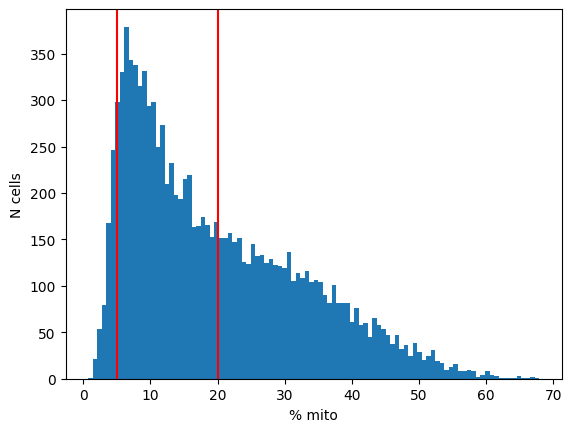

In [21]:
plt.hist(qc[0]['pct_counts_mt'], bins = 100)
plt.xlabel('% mito')
plt.ylabel('N cells')
plt.axvline(5, color='red') #default threshold
plt.axvline(20, color='red') #threshold used for MSK data

In [9]:
pd.DataFrame.describe(qc[0]['pct_counts_mt'])

count    10700.000000
mean        19.828760
std         12.933781
min          0.729927
25%          9.014265
50%         16.462646
75%         28.723707
max         67.901489
Name: pct_counts_mt, dtype: float64

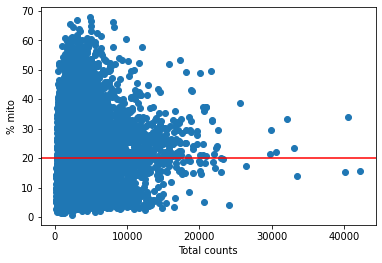

In [10]:
plt.scatter(x=qc[0]['total_counts'], y=qc[0]['pct_counts_mt'])
plt.xlabel('Total counts')
plt.ylabel('% mito')
plt.axhline(20, color='red')

Text(0, 0.5, 'N cells')

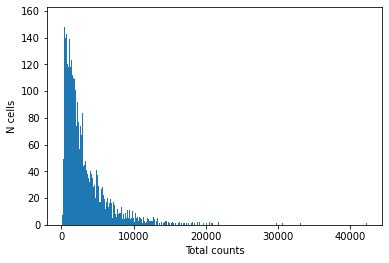

In [11]:
#plot histogram of number of counts per cell
plt.hist(qc[0]['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
#plt.axvline(2000, color='red')
#plt.xlim(0,1e3)

In [12]:
pd.DataFrame.describe(qc[0]['total_counts'])

count    10700.000000
mean      3285.641846
std       3266.511719
min        165.000000
25%       1172.750000
50%       2229.000000
75%       4276.250000
max      42273.000000
Name: total_counts, dtype: float64

(0.0, 4000.0)

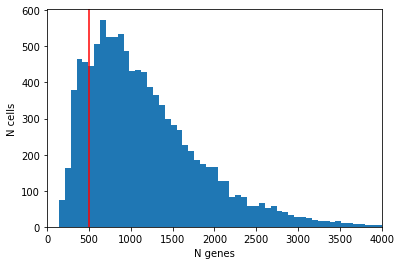

In [13]:
#plot histogram of number of unique genes by cells
plt.hist(qc[0]['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(500, color='red')
plt.xlim(0,4e3)

In [14]:
pd.DataFrame.describe(qc[0]['n_genes_by_counts'])

count    10700.000000
mean      1179.190374
std        733.139101
min        141.000000
25%        657.000000
50%       1017.000000
75%       1528.000000
max       7170.000000
Name: n_genes_by_counts, dtype: float64

Based on the plots above, we can infer that previous filtering of cells was made based on the following criteria:
* total_counts > 165
* n_genes_by_counts > 140

It appears that no cell filtering considering mitochondrial fraction by itself was performed. According to the STAR Protocols and [accompanying notebook](https://github.com/Ken-Lau-Lab/STAR_Protocol/blob/master/Variant_1_Heuristic_droplet_filtering.ipynb) the selection of cells was performed using a data driven approach, which doesn't involve hard cutoff points (so it's also very likely that the criteria mentioned above is just a coincidence).

### For now, no further processing will be performed.

# Formatting to run pseudobulk

In [22]:
# Normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.layers['normalized'] = adata.X
adata

AnnData object with n_obs × n_vars = 10696 × 30234
    obs: 'HTAN Parent Data File ID', 'HTAN Specimen ID', 'Cell_Type', 'Tumor_Type', 'Sample_Classification'
    var: 'mt'
    uns: 'log1p'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'normalized'

In [ ]:
adata3.write('vanderbilt_VAL_DIS_NONEPI_iatlas.h5ad', compression="gzip")
file_entity = synapseclient.File('vanderbilt_VAL_DIS_NONEPI_iatlas.h5ad', 'syn61518110')
file_entity = syn.store(file_entity)

Uploading to Synapse storage:   0%|          | 0.00/146M [00:00<?, ?B/s, vanderbilt_VAL_DIS_NONEPI_iatlas.h5ad]

KeyboardInterrupt: 